# Diferenciação Automática
[Notebook Fonte](https://github.com/chcomin/curso-visao-computacional-2024/blob/main/M02_aprendizado_de_maquina/2%20-%20Diferencia%C3%A7%C3%A3o%20autom%C3%A1tica.ipynb):
Este notebook é baseado no curso de Visão Computacional, ofertado pelo professor doutor Cesar Comin, pela Universidade Federal de São Carlos.<br>

A diferenciação automática é uma técnica computacional usada para avaliar a derivada de uma função expressa como um programa de computador. Diferentemente da diferenciação simbólica e da diferenciação numérica, a diferenciação automática explora a estrutura do código do programa para calcular derivadas de forma eficiente e precisa.

## Como Funciona

A diferenciação automática baseia-se na regra da cadeia do cálculo diferencial, que permite decompor a derivada de uma função composta em um produto de derivadas de funções mais simples. A ideia é que qualquer função computacional, não importa quão complexa, pode ser decomposta em uma sequência de operações elementares (como adições, multiplicações, funções trigonométricas, etc.), cujas derivadas são conhecidas.

Durante a execução do programa, a diferenciação automática mantém o registro do valor e da derivada de cada operação intermediária. Ao final do cálculo, a derivada da função desejada é obtida combinando as derivadas das operações elementares de acordo com a regra da cadeia.

## Aplicações em Redes Neurais

A diferenciação automática é fundamental para o treinamento de redes neurais, pois permite calcular os gradientes das funções de perda em relação aos parâmetros da rede (pesos e vieses) de forma eficiente. Esses gradientes são necessários para atualizar os parâmetros da rede usando o algoritmo de gradiente descendente durante o processo de otimização.

A retropropagação, que é o algoritmo padrão para treinar redes neurais, é um exemplo específico de diferenciação automática aplicada ao cálculo de gradientes em uma rede neural. Ele utiliza a regra da cadeia para propagar o erro da saída da rede para trás, camada por camada, calculando os gradientes necessários para ajustar os parâmetros da rede.

## Vantagens

- **Precisão**: A diferenciação automática fornece derivadas exatas até a precisão da máquina, ao contrário da diferenciação numérica, que pode sofrer de erros de arredondamento e aproximação.
- **Eficiência**: Ao explorar a estrutura do programa e reutilizar cálculos intermediários, a diferenciação automática pode ser mais eficiente do que métodos numéricos de diferenciação.
- **Flexibilidade**: A diferenciação automática pode ser aplicada a qualquer função expressa como um programa, incluindo funções complexas e não-lineares comuns em aprendizado de máquina.

Em resumo, a diferenciação automática é uma ferramenta poderosa para calcular derivadas de forma eficiente e precisa, desempenhando um papel crucial no treinamento de redes neurais e em outras aplicações de otimização em aprendizado de máquina.

### Diferenciação automática utilizando Pytorch

In [1]:
import torch

# Cria um tensor com valor 1. requires_grad=True significa que queremos
# calcular o gradiente em relação a essa variável.
x = torch.tensor(1., requires_grad=True)
y = 4*x**2

# Calcula o gradiente de y em relação a x.
y.backward()

# A componente dy/dx do gradiente é armazenada como o atributo .grad da variável x
dydx = x.grad

# dydx = 8*x = 8
print(dydx)

tensor(8.)


Vamos calcular o gradiente para uma expressão mais complexa:

$
\large
y = x_1*x_2 + x_3^2 - \frac{x_4}{x_2}
$

O gradiente de y é dado por

$
\large
\nabla y = (\frac{\partial{y}}{\partial{x1}}, \frac{\partial{y}}{\partial{x2}}, \frac{\partial{y}}{\partial{x3}}, \frac{\partial{y}}{\partial{x4}})
$

In [2]:
def function(x1, x2, x3, x4):
    
    y = x1*x2 + x3**2 - x4/x2
    return y

def gradient(y, x1, x2, x3, x4):
    
    y.backward()
    gradient = [x1.grad, x2.grad, x3.grad, x4.grad]
    return gradient

x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

y = function(x1, x2, x3, x4)
grad = gradient(y, x1, x2, x3, x4)

dydx1, dydx2, dydx3, dydx4 = grad

# dydx1 = x2 = 3
print(dydx1)

# dydx2 = x1 + x4/x2**2 = 2 + 4/9 = 2.4444
print(dydx2)

# dydx3 = 2*x3 = 2
print(dydx3)

# dydx4 = -1/x2 = -0.33333
print(dydx4)

# dydx = None porque o Pytorch armazena apenas gradientes de váriaveis folhas
print(y.grad)

tensor(3.)
tensor(2.4444)
tensor(2.)
tensor(-0.3333)
None


/home/fonta42/anaconda3/envs/interpreting-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)


# Cálculo de Gradientes com o Método `backward` do PyTorch

## Critérios para Cálculo do Gradiente
Para que o gradiente de uma variável seja calculado pelo método `backward()`, a variável deve atender aos seguintes critérios:

1. **Utilização na Computação de `y`**: A variável deve ter sido usada diretamente ou indiretamente no cálculo do tensor `y`.
2. **Atributo `requires_grad=True`**: A variável deve ter o atributo `requires_grad` definido como `True`, indicando que estamos interessados em calcular seus gradientes.
3. **Ser Folha do Grafo de Computação**: A variável deve ser uma "folha" no grafo de computação, ou seja, ela não deve ter sido calculada a partir de outras variáveis com `requires_grad=True`.

## Derivadas Intermediárias
Se for necessário calcular a derivada de alguma variável intermediária para determinar o gradiente final, o PyTorch realizará esse cálculo automaticamente. No entanto, essas derivadas intermediárias são mantidas em memória apenas temporariamente e são apagadas assim que não são mais necessárias, para otimizar o uso de recursos. Apenas os gradientes em relação às variáveis folha são retidos após a conclusão do cálculo.

## Gradientes de Funções Compostas
O cálculo de gradientes para funções compostas segue a regra da cadeia do cálculo diferencial. Por exemplo, considerando as funções:

$$
y(x) = 3x^2
$$
$$
z(y) = y^4
$$

Para calcular o gradiente de `z` em relação a `x`, aplicamos a regra da cadeia:

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

Substituindo as derivadas das funções individuais, obtemos:

$$
\frac{\partial z}{\partial x} = 4y^3 \cdot 6x
$$

In [3]:
def y_func(x):
    return 3*x**2

def z_func(y):
    return y**4

x = torch.tensor(2., requires_grad=True)
y = y_func(x)
z = z_func(y)

# Como mencionado, o Pytorch mantém apenas o gradiente de variáveis folha 
# (x no nosso caso). Para podermos acessar o gradiente de uma variável não-folha 
# precisamos indicar explicitamente que queremos manter o gradiente da variável 
# usando o método .retain_grad()
y.retain_grad() 
z.backward()

# dzdx = 4*y**3*6*x = (4*12**3)*6*2 = 82944
print(x.grad)

# dzdy = 4*y**3 = 4*12**3 = 6912
print(y.grad)

tensor(82944.)
tensor(6912.)


Internamente o Pytorch cria um *grafo de computação* que armazena todas as informações necessárias para calcular o gradiente de qualquer variável. O grafo possui nós associados às variáveis, e cada nó possui as informações necessárias para calcular a derivada do valor de saída do nó em relação aos valores de entrada. Essas informações podem ser acessadas através do atributo .grad_fn

![](../data/notebook_images/autograd.png)

In [4]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(5., requires_grad=True)
z = x*y

print(z.grad_fn)
print(z.grad_fn._saved_other)
print(z.grad_fn._saved_self)

tensor(5., requires_grad=True)
tensor(2., requires_grad=True)


In [5]:
dzdx, dzdy = z.grad_fn(torch.tensor(1.))
print(dzdx, dzdy)

tensor(5., grad_fn=<MulBackward0>) tensor(2., grad_fn=<MulBackward0>)


### Detalhes importantes ao trabalhar com o Pytorch

#### Acúmulo de gradientes

In [6]:
# Parâmetro do modelo
w = torch.tensor(1., requires_grad=True)
# Dados de entrada
data = [4, 7, 2, 8]
# Ilustração de parte de um loop de treinamento. Para cada dado, calculamos a saída e o gradiente.
for x in data:
    y = w*x
    y.backward()
    print(w.grad)    

tensor(4.)
tensor(11.)
tensor(13.)
tensor(21.)


Note que o gradiente está sempre aumentando, o que não é o esperado. Isso ocorre porque o Pytorch **sempre acumula os gradientes** a cada vez que o método .backward() é chamado. Em outras palavras, ele faz algo como:

dydx = calculate_gradient(y, x)\
x.grad += dydx

A acumulação de gradientes é útil em certos cenários, como no treinamento de redes neurais recorrentes (RNNs) ou quando se deseja calcular a média dos gradientes em várias mini-batches antes de atualizar os parâmetros do modelo. No entanto, na maioria dos casos, especialmente em redes neurais convencionais, o acúmulo de gradientes não é desejado, pois queremos que cada chamada a .backward() reflita apenas a informação do lote atual de dados.

Se não desejamos acumular os gradientes, o que é o caso em geral, devemos sempre apagar os gradientes antes de chamar .backward() novamente:

In [7]:
w = torch.tensor(1., requires_grad=True)
data = [4, 7, 2, 8]
for x in data:
    # Remove o gradiente anteriormente computado, se existir. Poderíamos também utilizar
    # w.grad = torch.tensor(0.), mas atribuir a None proporciona uma performance um pouco melhor
    w.grad = None
    y = w*x
    y.backward()
    print(w.grad)

tensor(4.)
tensor(7.)
tensor(2.)
tensor(8.)


#### Modificando um tensor que possui requires_grad=True

In [8]:
w = torch.tensor(1., requires_grad=True)
data = [4, 7, 2, 8]
lr = 0.1
# Ilustração de parte de um loop de treinamento, agora também com a atualização do
# parâmetro do modelo de acordo com o gradiente calculado. 
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    # O comando abaixo dará erro. Foi adicionado um try para o notebook poder executar
    try:
        w -= lr*w.grad
    except RuntimeError as re:
        print(re)

a leaf Variable that requires grad is being used in an in-place operation.
a leaf Variable that requires grad is being used in an in-place operation.
a leaf Variable that requires grad is being used in an in-place operation.
a leaf Variable that requires grad is being used in an in-place operation.


O código acima dá erro. A princípio o erro pode parecer confuso, mas podemos entendê-lo ao pensar no grafo que o Pytorch constrói para calcular os gradientes.

O termo **leaf variable** está relacionado à variável `w`. Ela é chamada de variável folha porque ela não é calculada a partir de outras variáveis, isto é, ela é definida com um valor inicial utilizando a função torch.tensor(). O Pytorch precisa saber o valor dessa variável ao calcular os gradientes, pois ele pode ser necessário ao aplicar a regra da cadeia.

A operação `w -= valor` é uma operação in-place. Ela modifica o valor do tensor. Com isso, se o Pytorch permitisse essa operação, não teria como ele acessar o valor da variável. Por isso ele evita que isso ocorra dando erro.

Ao invés de usar `w -= valor`, poderíamos atualizar o valor de outra forma:

In [9]:
w = torch.tensor(1., requires_grad=True)
data = [4, 7, 2, 8]
lr = 0.1
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    try:
        w = w - lr*w.grad
    except TypeError as te:
        print(te)

unsupported operand type(s) for *: 'float' and 'NoneType'
unsupported operand type(s) for *: 'float' and 'NoneType'
unsupported operand type(s) for *: 'float' and 'NoneType'


/home/fonta42/anaconda3/envs/interpreting-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  if __name__ == '__main__':


Erro novamente? Agora o problema é outro. É importante lembrar que qualquer operação envolvendo um tensor que requer gradiente é armazenada no grafo de computação. Ao fazer `w = w - lr*w.grad`, estamos criando uma nova variável chamada `w` cujo valor é dado por `w - lr*w.grad`. Isso faz com que `w` não seja mais uma variável folha, e não podemos mais acessar o atributo .grad dela.

Mais importante, não tem porque registrarmos a operação `w = w - lr*w.grad` no grafo de computação. Queremos apenas atualizar o valor do gradiente. Essa operação nunca será utilizada no cálculo de gradiente. Portanto, para essa operação em particular, devemos evitar de registrá-la no grafo:

In [10]:
w = torch.tensor(1., requires_grad=True)
data = [4, 7, 2, 8]
lr = 0.1
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    # Contexto Python. Todo código dentro do contexto não será registrado para o 
    # cálculo do gradiente
    with torch.no_grad():
        w -= lr*w.grad
    print(w)

tensor(0.6000, requires_grad=True)
tensor(-0.1000, requires_grad=True)
tensor(-0.3000, requires_grad=True)
tensor(-1.1000, requires_grad=True)


#### Copiando dados e removendo um tensor do grafo de computação

In [11]:
x = torch.randn(5, requires_grad=True)

# Copia os dados de x para y. Note que a cópia é incluída no grafo de computação. 
y = torch.clone(x)
print(y)
# Define um novo tensor, removendo ele do cálculo de gradientes. Importante! Os dados
# dos dois tensores são compartilhados. Não modifique o tensor y, pois pode levar
# a erros no cálculo do gradiente
y = x.detach()
print(y)
# Remove o tensor do grafo e copia os valores. Comando ideal para copiar valores
y = x.detach().clone()
print(y)
# Equivalente ao código acima
with torch.no_grad():
    y = x.clone()
print(y)

# Não recomendado. Cria um novo tensor com requires_grad=False copiando os dados de x 
#y = torch.tensor(x)

tensor([-0.4255,  0.7791, -0.2967, -0.1466, -1.0783], grad_fn=<CloneBackward0>)
tensor([-0.4255,  0.7791, -0.2967, -0.1466, -1.0783])
tensor([-0.4255,  0.7791, -0.2967, -0.1466, -1.0783])
tensor([-0.4255,  0.7791, -0.2967, -0.1466, -1.0783])


In [12]:
x = torch.randn(100, requires_grad=True)
print(x.requires_grad)

# Remove o tensor do grafo
x.requires_grad = False

# Equivalente ao comando acima 
x.requires_grad_(False)

# Conversão entre o pytorch e numpy. Importante! As variáveis compartilham a memória. 
# A alteração em uma variável altera a outra. Outra coisa, a conversão dará erro se
# o tensor possuir requires_grad=True
y = x.numpy()
z = torch.from_numpy(y)

# Tensores possuindo um único valor podem ser transformados em um valor Python
# através do método .item()
soma = x.sum().item()

True


### Exemplo de implementação de diferenciação automática

A célula abaixo utiliza uma classe bem simples chamada `Value` que mostra como implementar diferenciação automática. Não é necessário executar ela para executar o resto do notebook. Ela está aqui apenas para mostrar como a diferenciação automática pode ser implementada.

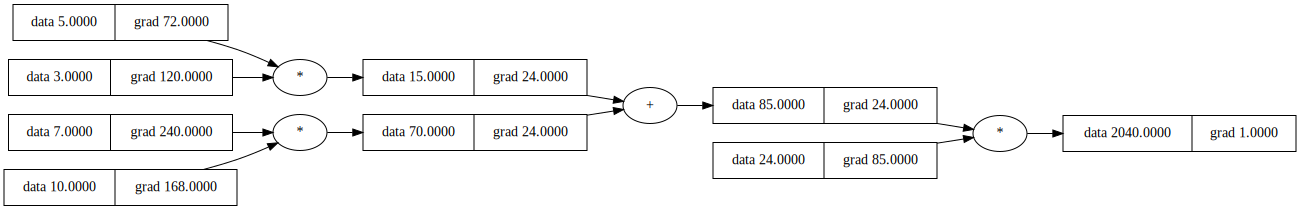

In [13]:
from autodiff import Value, draw_dot

x1 = Value(5.0)
x2 = Value(7.0)
y = 3*x1 + 10*x2
z = 24*y
z.backward()
draw_dot(z)

### Regressão linear usando diferenciação automática

Para minimizar a função de custo, precisamos ajustar os parâmetros $a$ e $b$ de forma que o gradiente da função de custo em relação a esses parâmetros seja zero. No entanto, calcular esses gradientes manualmente pode ser complexo e propenso a erros, especialmente para funções de custo e modelos mais complexos.

Aqui entra a diferenciação automática, que permite calcular os gradientes de forma eficiente e precisa. Usando bibliotecas como o PyTorch, podemos definir os parâmetros do modelo como tensores com requires_grad=True, e o PyTorch rastreará automaticamente todas as operações realizadas nesses tensores para construir um grafo de computação. Quando chamamos o método .backward() na função de custo, o PyTorch usa esse grafo para calcular os gradientes da função de custo em relação aos parâmetros do modelo.
Exemplo com PyTorch

No exemplo de código fornecido, a classe Model define o modelo de regressão linear, e a função mse calcula o erro quadrático médio. Durante o treinamento, em cada iteração, chamamos o método .backward() na função de custo para calcular os gradientes, e depois atualizamos os parâmetros do modelo na direção oposta aos gradientes para minimizar a função de custo.

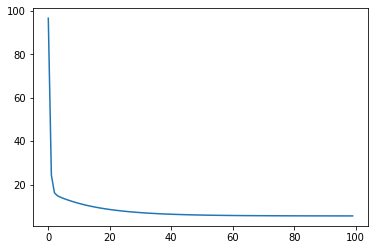

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class Model:

    def __init__(self, a, b):

        # Parâmetros do modelo
        self.a = torch.tensor(a, requires_grad=True)
        self.b = torch.tensor(b, requires_grad=True)

    def __call__(self, x):
        y = self.a*x + self.b
        return  y

def mse(model, x, y):
    '''Erro quadrático médio'''

    ym = model(x)
    error = torch.mean((y-ym)**2)

    return error

def step(model, x, y, lr):

    # Apaga os gradientes
    model.a.grad = None
    model.b.grad = None
    error = mse(model, x, y)
    # Calcula os gradientes
    error.backward()
    # Atualiza os gradientes
    with torch.no_grad():
        model.a -= lr*model.a.grad
        model.b -= lr*model.b.grad

    return error.item() # Pode-se usar .detach() para retirar do grafo de computação e retornar o tensor como um todo

data = torch.from_numpy(np.loadtxt('../data/age_data_1.txt'))
x, y = data.T

model = Model(a=0., b=0.)
num_epochs = 100
lr = 0.3
errors = []
for epoch in range(0, num_epochs):
    error = step(model, x, y, lr)
    errors.append(error)

plt.plot(errors)

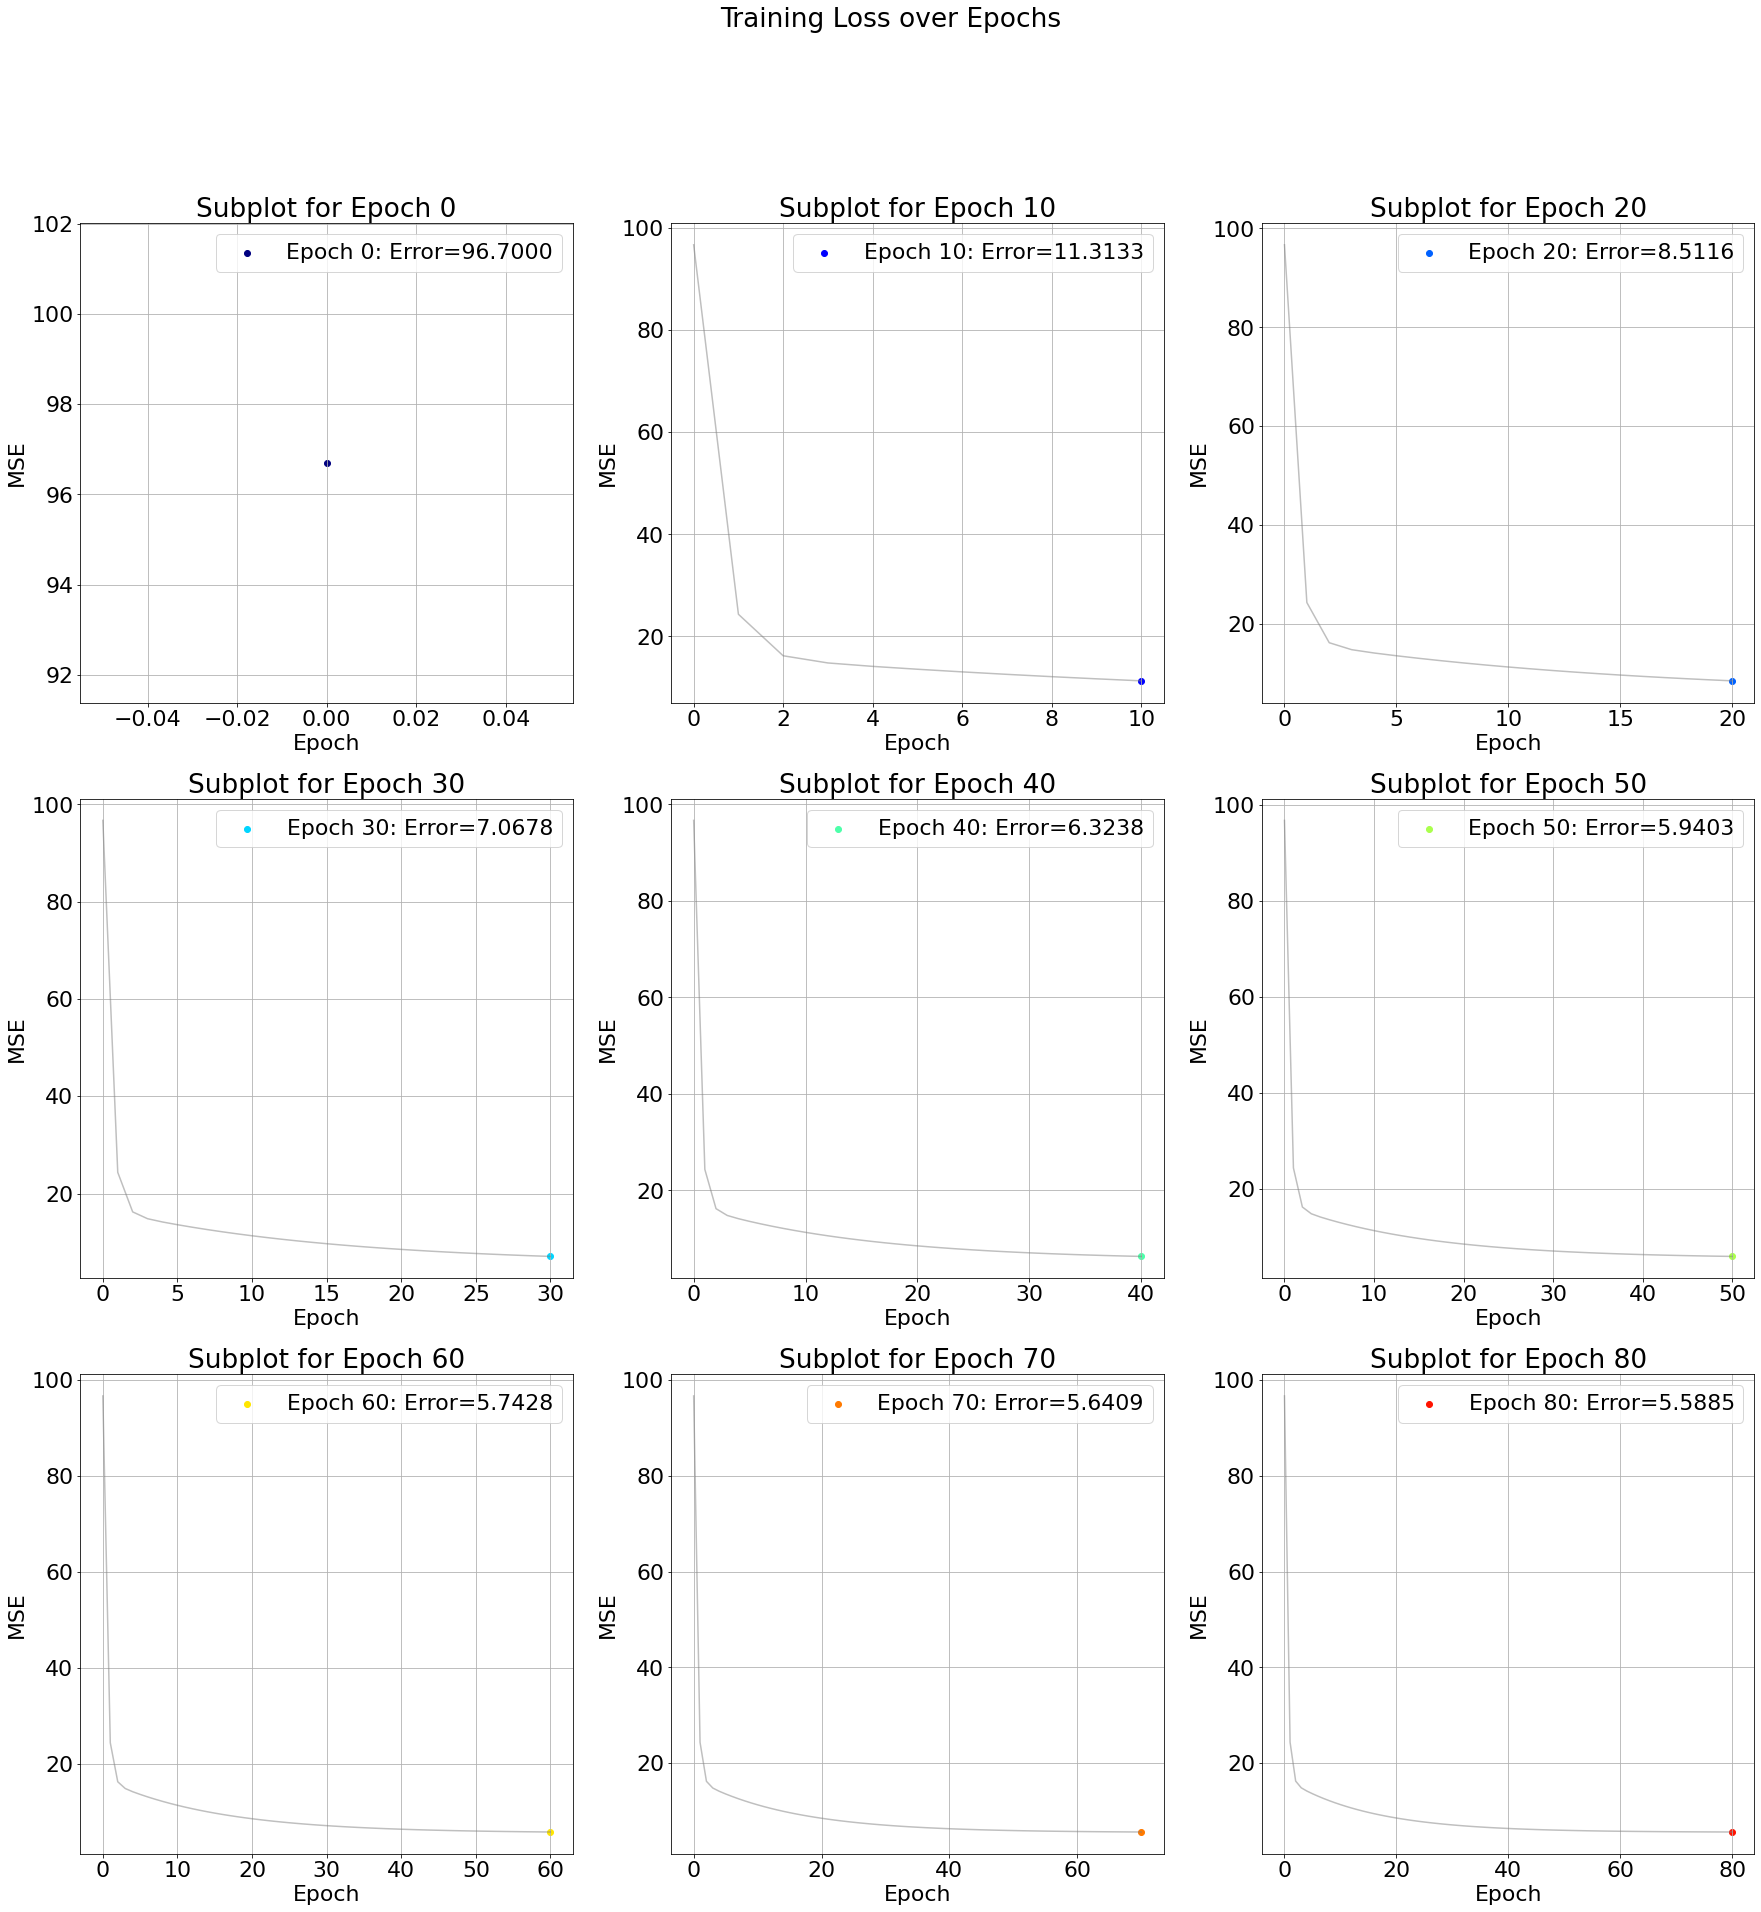

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class Model:
    def __init__(self, a, b):
        # Parâmetros do modelo
        self.a = torch.tensor(a, requires_grad=True)
        self.b = torch.tensor(b, requires_grad=True)

    def __call__(self, x):
        return self.a * x + self.b

def mse(model, x, y):
    '''Erro quadrático médio'''
    ym = model(x)
    error = torch.mean((y - ym) ** 2)
    return error

def step(model, x, y, lr):
    model.a.grad = None
    model.b.grad = None
    error = mse(model, x, y)
    error.backward()
    with torch.no_grad():
        model.a -= lr * model.a.grad
        model.b -= lr * model.b.grad
    return error.item()

data = torch.from_numpy(np.loadtxt('../data/age_data_1.txt'))
x, y = data.T

model = Model(a=0., b=0.)
num_epochs = 100
lr = 0.3
errors = []

plt.rcParams.update({'font.size': 22})  
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
fig.suptitle('Training Loss over Epochs')  

axes_list = [ax for sublist in axes for ax in sublist]
colors = plt.cm.jet(np.linspace(0, 1, 10)) 
update_interval = num_epochs // 10

for epoch in range(num_epochs):
    error = step(model, x, y, lr)
    errors.append(error)
    
    if epoch % update_interval == 0 and epoch // update_interval < 9:
        ax_idx = epoch // update_interval
        ax = axes_list[ax_idx]
        color_idx = epoch // 10 % 10  
        ax.scatter(epoch, error, color=colors[color_idx], label=f'Epoch {epoch}: Error={error:.4f}', marker='o')
        ax.plot(errors, linestyle='-', color='grey', alpha=0.5)  
        ax.set_title(f'Subplot for Epoch {epoch}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')
        ax.legend()  
        ax.grid(True)

plt.show()